In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import unit_norm
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from tensorflow.image import rgb_to_grayscale

/home/stevevn/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stevevn/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stevevn/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/stevevn/anaco

In [ ]:
cat = 'mmm'

In [ ]:
df = pd.read_csv(f'{cat}_attr.csv')
df = df.drop(df.columns[1:5], axis = 1).fillna(0)
df

,image_name,mini,midi,maxi
0,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
1,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
2,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
3,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
4,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
...,...,...,...,...
8180,img/Chiffon-Paneled_Maxi_Dress/img_00000024.jpg,0.0,0.0,1.0
8181,img/Crocheted_Gauze_Maxi_Dress/img_00000020.jpg,0.0,0.0,1.0
8182,img/Dainty_A-Line_Dress/img_00000074.jpg,0.0,0.0,1.0
8183,img/Butterfly_Print_Maxi_Dress/img_00000066.jpg,0.0,0.0,1.0


In [ ]:
all_array = np.load(f'{cat}_array.npz', allow_pickle=True)['arr_0']
all_array = np.array([x.numpy() / 255 for x in all_array]) #color
# all_array = np.array([rgb_to_grayscale(x.numpy()) / 255 for x in all_array]) #grayscale

all_array

2022-05-24 02:52:36.553310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 02:52:36.588305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 02:52:36.588654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 02:52:36.589491: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_array, df.drop('image_name', axis=1), random_state=1, test_size=0.2)

In [ ]:
model_self = Sequential()

model_self.add(Conv2D(128, kernel_size=(3,3), activation="relu", input_shape=(100, 100, 3), kernel_regularizer=regularizers.l2(l=0.01)))
model_self.add(BatchNormalization())

model_self.add(MaxPooling2D(pool_size=(4,4)))
model_self.add(Dropout(0.2))


model_self.add(Conv2D(64, kernel_size=(3,3), activation="relu", kernel_regularizer=regularizers.l2(l=0.01)))
model_self.add(MaxPooling2D(pool_size=(4,4)))
model_self.add(Dropout(0.2))

model_self.add(Conv2D(64, kernel_size=(3,3), activation="relu", kernel_regularizer=regularizers.l2(l=0.01)))
model_self.add(Dropout(0.2))


model_self.add(Conv2D(32, kernel_size=(3,3), activation="relu", kernel_regularizer=regularizers.l2(l=0.01)))
model_self.add(Dropout(0.2))


model_self.add(Flatten())

model_self.add(Dense(128, activation='relu'))
model_self.add(Dense(64, activation='relu'))

#model_self.add(Conv2D(128, kernel_size=(9, 9), activation='relu'))
#model_self.add(MaxPooling2D(pool_size=(4,4)))
#model_self.add(Dropout(0.2))

model_self.add(Dense(y_train.shape[1], activation="softmax"))

model_self.summary()

model_self.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
model_self.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
model_self.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

In [ ]:
batch_size = 64
epochs = 150

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta = 0.05, verbose = 1)

history_self = model_self.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[early_stopping],
          validation_data=(X_test, y_test))

Epoch 1/150


2022-05-24 02:52:57.677763: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8303
2022-05-24 02:53:00.124787: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


103/103 [==============================] - 12s 49ms/step - loss: 2.9753 - accuracy: 0.3655 - val_loss: 2.8336 - val_accuracy: 0.3812
Epoch 2/150
103/103 [==============================] - 4s 40ms/step - loss: 2.7125 - accuracy: 0.3856 - val_loss: 2.6042 - val_accuracy: 0.4093
Epoch 3/150
103/103 [==============================] - 4s 40ms/step - loss: 2.4974 - accuracy: 0.3931 - val_loss: 2.4062 - val_accuracy: 0.4117
Epoch 4/150
103/103 [==============================] - 4s 39ms/step - loss: 2.3118 - accuracy: 0.4163 - val_loss: 2.2369 - val_accuracy: 0.4374
Epoch 5/150
103/103 [==============================] - 4s 39ms/step - loss: 2.1493 - accuracy: 0.4377 - val_loss: 2.0876 - val_accuracy: 0.4606
Epoch 6/150
103/103 [==============================] - 4s 41ms/step - loss: 2.0131 - accuracy: 0.4623 - val_loss: 1.9480 - val_accuracy: 0.5162
Epoch 7/150
103/103 [==============================] - 4s 40ms/step - loss: 1.8821 - accuracy: 0.4998 - val_loss: 1.8171 - val_accuracy: 0.5467
Epo

Text(0.5, 1.0, 'Loss Curves')

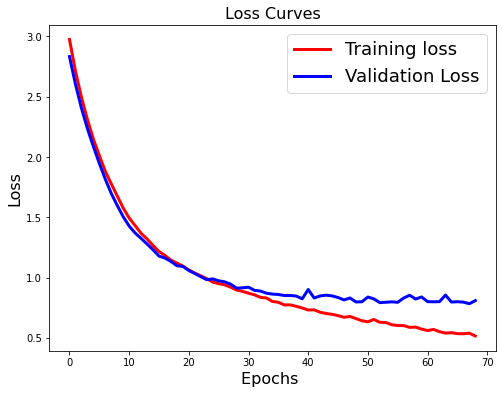

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history_self.history['loss'],'r',linewidth=3.0)
plt.plot(history_self.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

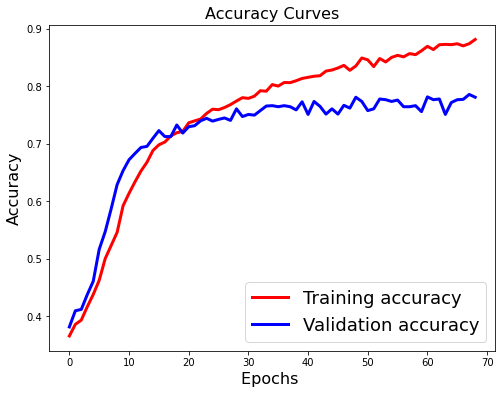

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history_self.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_self.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

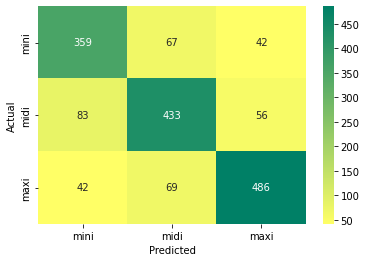

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model_self.predict(X_test), axis = 1)

y_test_label = np.argmax(y_test.to_numpy(), axis = 1)

matrix = confusion_matrix(y_test_label, y_pred)
ticks = ['mini','midi','maxi']
sns.heatmap(matrix, annot=True, fmt='g', xticklabels=ticks, yticklabels=ticks, cmap='summer_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
wrong_pred = y_test[y_pred != y_test_label]
wrong_pred

,mini,midi,maxi
7315,0.0,0.0,1.0
7379,0.0,0.0,1.0
473,1.0,0.0,0.0
1332,1.0,0.0,0.0
2252,1.0,0.0,0.0
...,...,...,...
4580,0.0,1.0,0.0
6378,0.0,0.0,1.0
6488,0.0,0.0,1.0
596,1.0,0.0,0.0
